In [21]:
from coviddata import CovidData
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [22]:
covid = CovidData('MB')

In [23]:
covid.latest_data

{'date': '2021-04-21',
 'change_cases': 162,
 'change_fatalities': 1,
 'change_tests': 3030,
 'change_hospitalizations': 5,
 'change_criticals': 1,
 'change_recoveries': 111,
 'change_vaccinations': 13412,
 'change_vaccinated': 397,
 'change_vaccines_distributed': 35100,
 'total_cases': 36632,
 'total_fatalities': 961,
 'total_tests': 630143,
 'total_hospitalizations': 137,
 'total_criticals': 34,
 'total_recoveries': 33838,
 'total_vaccinations': 364389,
 'total_vaccinated': 70394,
 'total_vaccines_distributed': 521910}

In [37]:
print(f"{covid.new_cases} new cases in the province ({covid.total_active} active)")
print(f"{covid.test_positivity:.2%} test positivity rate")
print(f"{covid.new_deaths} new deaths ({covid.total_deaths} total)")
print(f"{covid.new_vaccinations} new vaccinations")
print(f"{covid.total_vaccinations} total doses administered")
print(f"{covid.total_vaccines_received-covid.total_vaccinations} doses in storage")
print(f"{covid.total_vaccinations / covid.total_vaccines_received:.2%} of all doses received administered")
print(f"{np.mean([i['change_vaccinations'] for i in covid.data[-7:]], dtype=int)} vaccines being administered daily (7 day average)")

162 new cases in the province (1833 active)
5.74% test positivity rate
1 new deaths (961 total)
13412 new vaccinations
364389 total doses administered
157521 doses in storage
69.82% of all doses recieved administered
9224 vaccines being administered daily (7 day average)


In [47]:
DAYS = 30
AVG_SIZE = 7
dates = []
new_cases = []
avg_cases = []
new_vaccinations = []
avg_vaccinations = []
recieved = []
administered = []
hospitalizations = []
criticals = []
for i, data in enumerate(covid.data[-DAYS:]):
    dates.append(data['date'])
    new_cases.append(data['change_cases'])
    new_vaccinations.append(data['change_vaccinations'])
    administered.append(data['total_vaccinations'])
    recieved.append(data['total_vaccines_distributed'])
    hospitalizations.append(data['total_hospitalizations'])
    criticals.append(data['total_criticals'])
    if i >= AVG_SIZE:
        avg_cases.append(np.mean(new_cases[i-AVG_SIZE:i+AVG_SIZE]))
        avg_vaccinations.append(np.mean(new_vaccinations[i-AVG_SIZE:i+AVG_SIZE]))
labels = [dates[i] for i in np.linspace(0, DAYS-1, 10, dtype=int)]

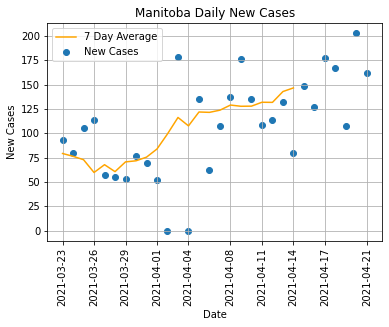

In [26]:
plt.title('Manitoba Daily New Cases')
plt.scatter(dates, new_cases, label='New Cases')
plt.plot(dates[0:len(avg_cases)], avg_cases, label='7 Day Average', color='orange')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(labels, rotation='vertical')
plt.grid()
plt.legend()
plt.show()

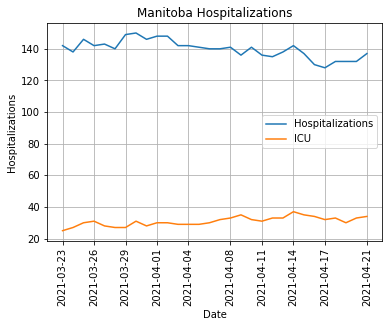

In [48]:
plt.title('Manitoba Hospitalizations')
plt.plot(dates, hospitalizations, label ='Hospitalizations')
plt.plot(dates, criticals, label='ICU')
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.xticks(labels, rotation='vertical')
plt.grid()
plt.legend()
plt.show()

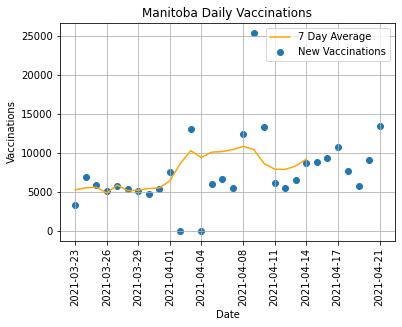

In [27]:
plt.title('Manitoba Daily Vaccinations')
plt.scatter(dates, new_vaccinations, label='New Vaccinations')
plt.plot(dates[0:len(avg_vaccinations)], avg_vaccinations, label='7 Day Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Vaccinations')
plt.xticks(labels, rotation='vertical')
plt.grid()
plt.legend()
plt.show()

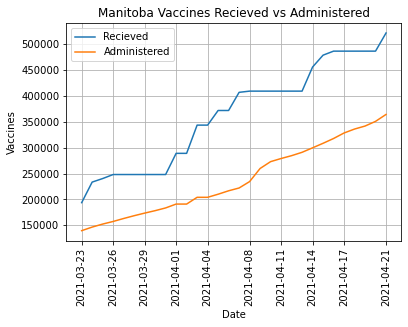

In [28]:
plt.title('Manitoba Vaccines Recieved vs Administered')
plt.plot(dates, recieved, label='Recieved')
plt.plot(dates, administered, label='Administered')
plt.xlabel('Date')
plt.ylabel('Vaccines')
plt.xticks(labels, rotation='vertical')
plt.grid()
plt.legend()
plt.show()

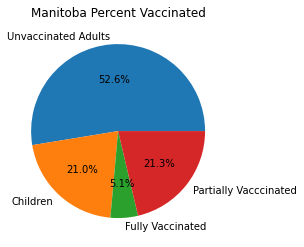

In [45]:
children = int(covid.population * 0.21)
fully_vaccinated = covid.latest_data['total_vaccinated']
one_dose = covid.latest_data['total_vaccinations'] - fully_vaccinated
unvaccinated_adults = covid.population - children - fully_vaccinated - one_dose

plt.pie(
    [unvaccinated_adults, children, fully_vaccinated, one_dose],
    labels=['Unvaccinated Adults', 'Children', 'Fully Vaccinated', 'Partially Vacccinated'],
    autopct='%1.1f%%'
)
plt.title('Manitoba Percent Vaccinated')
plt.show()